In [1]:
# !pip install pandas matplotlib numpy

In [2]:
import os
from pathlib import Path

from plotter import *
from plotter.epochstats import EpochStats
from plotter.plotepochstats import PlotRangeQueryStats
from plotter.plotselectivities import PlotSelectivities, PlotSelectivitiesRangeQuery
from plotter.dataclass import SelectivityVsMetric, SelectivityVsRangeQueryMetric
from plotter.utils import vanilla_dirname, rqdc_dirname

PROJECT_DIR = Path.cwd().parent.parent

In [3]:
experiments_to_plot = list()

for lb, ub in LOWER_UPPER_BOUNDS:
    for selectivity in SELECTIVITY:
        experiments_to_plot.append({
            "inserts": INSERTS,
            "updates": UPDATES,
            "range": RANGE_QUERIES,
            "selectivity": selectivity,
            "sizeRatio": SIZE_RATIO,
            "entrySize": ENTRY_SIZE,
            "entriesPerPage": ENTRIES_PER_PAGE,
            "numPagesPerFile": NUM_PAGE_PER_FILE,
            "lowerBound": lb,
            "upperBound": ub,
        })

In [4]:
stats_for_different_selectivities = dict()
stats_for_different_selectivities_rq = dict()

for exp in experiments_to_plot:
    selectivity = exp['selectivity']
    EXPDIRNAME = f"{PROJECT_DIR}/.vstats/experiments-{TAG}-E{ENTRY_SIZE}-B{ENTRIES_PER_PAGE}-S{RANGE_QUERIES}-Y{selectivity}-T{SIZE_RATIO}"
    vandirpath = os.path.join(EXPDIRNAME, "VanillaRandom")
    rqdcdirpath = os.path.join(EXPDIRNAME, "RangeReduceRandom")
    
    vandirpath_overlapping_full = os.path.join(EXPDIRNAME, "VanillaOverlappingFull")
    rqdcdirpath_overlapping_full = os.path.join(EXPDIRNAME, "RangeReduceOverlappingFull")
    
    vandirpath_overlapping_partial = os.path.join(EXPDIRNAME, "VanillaOverlappingPartial")
    rqdcdirpath_overlapping_partial = os.path.join(EXPDIRNAME, "RangeReduceOverlappingPartial")
    
    filesize = exp["entrySize"] * exp["entriesPerPage"] * exp["numPagesPerFile"]

    van = EpochStats(vandirpath, NUMEPOCHS, filesize)
    rqdc = EpochStats(rqdcdirpath, NUMEPOCHS, filesize)

    van_overlapping_rq = EpochStats(vandirpath_overlapping_full, NUMEPOCHS, filesize)
    rqdc_overlapping_rq = EpochStats(rqdcdirpath_overlapping_full, NUMEPOCHS, filesize)

    van_overlapping_partial = EpochStats(vandirpath_overlapping_partial, NUMEPOCHS, filesize)
    rqdc_overlapping_partial = EpochStats(rqdcdirpath_overlapping_partial, NUMEPOCHS, filesize)
    # stats_for_different_selectivities[selectivity] = SelectivityVsMetric(
    #     Vanilla=van.get_plotstats()[0],
    #     RangeReduce=rqdc.get_plotstats()[0],
    #     RangeReduceSameRQ=rqdc1.get_plotstats()[0],
    #     RangeReduceOverlappingRQ=rqdc2.get_plotstats()[0],
    # )

    # stats_for_different_selectivities_rq[selectivity] = SelectivityVsRangeQueryMetric(
    #     Vanilla=van.get_rangequerystats(),
    #     RangeReduce=rqdc.get_rangequerystats(),
    #     RangeReduceSameRQ=rqdc1.get_rangequerystats(),
    #     RangeReduceOverlappingRQ=rqdc2.get_rangequerystats(),
    # )

In [5]:
# plot_selectivities = PlotSelectivities(stats_for_different_selectivities)

In [6]:
# plot_selectivities.plot_total_bytes_written()

In [7]:
# plot_selectivities.plot_compaction_debt()

In [8]:
# plot_selectivities.plot_write_amp_debt()

In [9]:
# plot_selectivities.plot_write_amp_full_debt()

In [10]:
# plot_selectivities.plot_write_amp_partial_debt()

In [11]:
# plot_selectivities.plot_space_amplification()

In [12]:
# plot_selectivities.plot_compaction_read()

In [13]:
# plot_selectivities_rq = PlotSelectivitiesRangeQuery(stats_for_different_selectivities_rq)

In [14]:
# plot_selectivities_rq.avg_bytes_written_for_range_queries()

In [15]:
# plot_selectivities_rq.avg_bytes_read_for_range_queries()

In [16]:
# plot_selectivities_rq.avg_latency_for_range_queries()

In [17]:
# PlotSelectivities.plot_total_data_movement(stats_for_different_selectivities, stats_for_different_selectivities_rq)

In [18]:
# plot_exp = PlotRangeQueryStats(van.get_rangequerystats(), rqdc.get_rangequerystats())
# plot_exp.bytes_read_for_each_range_query()
# plot_exp.latency_for_each_range_query()

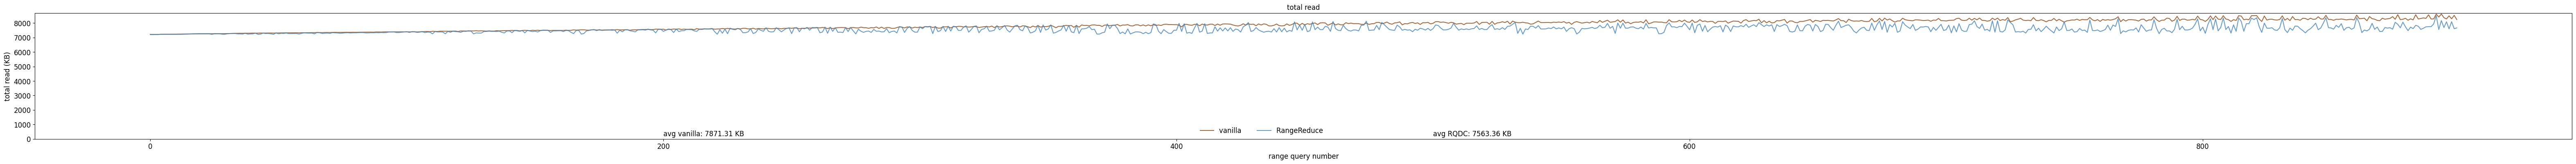

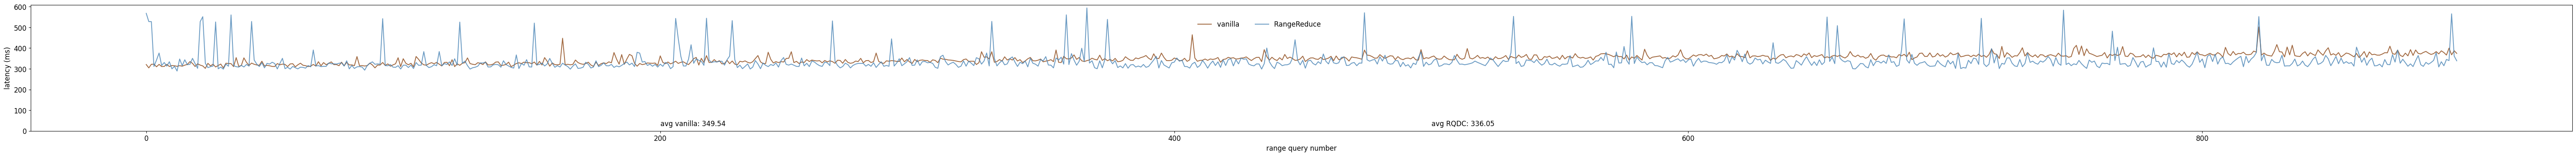

In [19]:
plot_exp = PlotRangeQueryStats(van.get_rangequerystats(), rqdc.get_rangequerystats())
plot_exp.bytes_read_for_each_range_query()
plot_exp.latency_for_each_range_query()

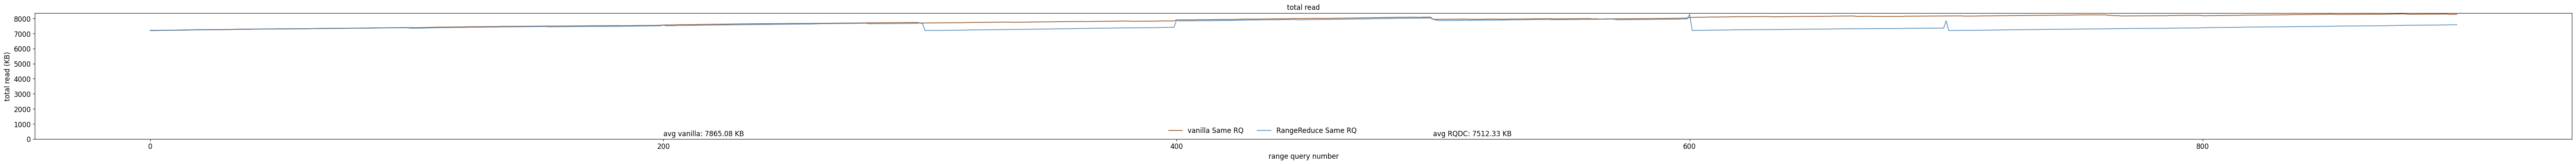

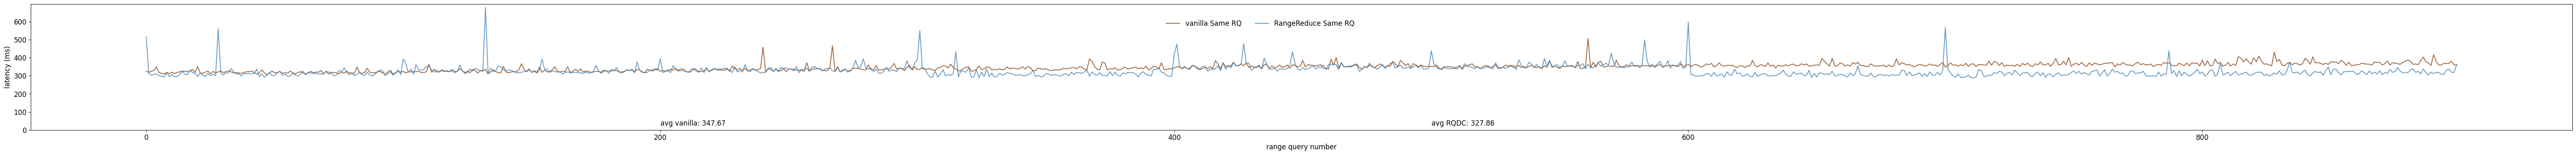

In [20]:
plot_exp = PlotRangeQueryStats(van_overlapping_rq.get_rangequerystats(), rqdc_overlapping_rq.get_rangequerystats())
plot_exp.bytes_read_for_each_range_query(range_query_pattern="Same RQ")
plot_exp.latency_for_each_range_query(range_query_pattern="Same RQ")

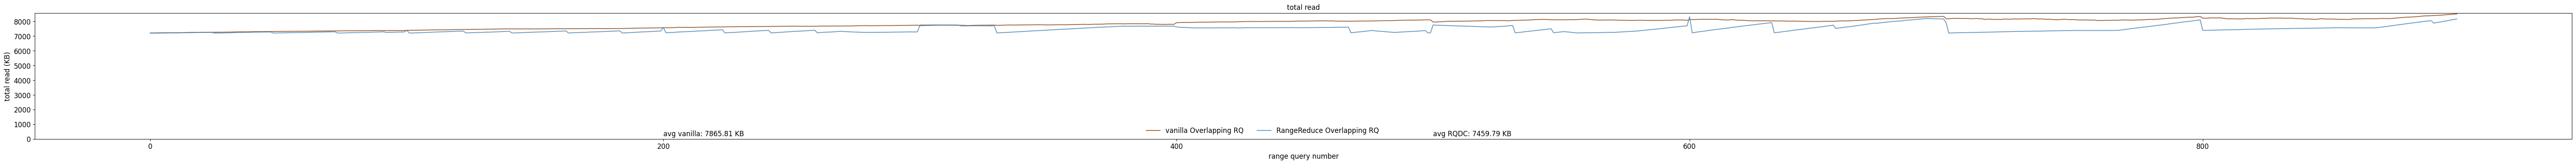

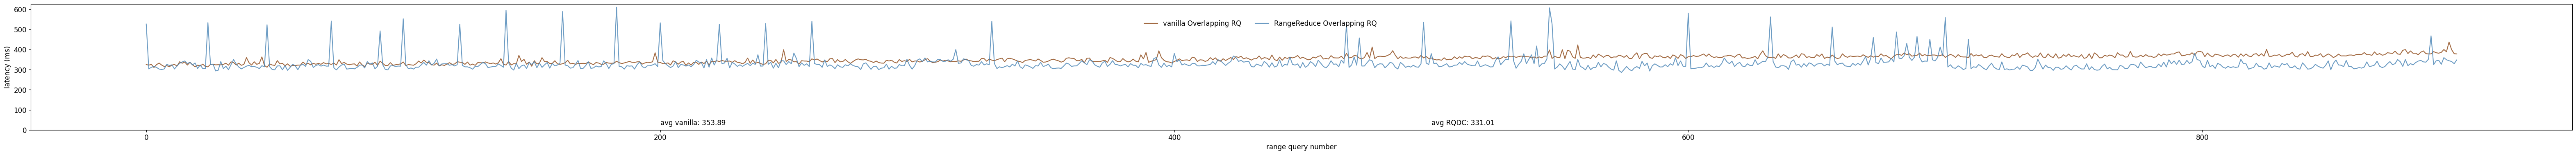

In [21]:
plot_exp = PlotRangeQueryStats(van_overlapping_partial.get_rangequerystats(), rqdc_overlapping_partial.get_rangequerystats())
plot_exp.bytes_read_for_each_range_query(range_query_pattern="Overlapping RQ")
plot_exp.latency_for_each_range_query(range_query_pattern="Overlapping RQ")